In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('weather_data.csv')

In [4]:
data

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331
...,...,...,...,...,...,...,...
306,2023-11-03,22.072834,37.756910,4.729355,No Rain,27.307081,954.564875
307,2023-11-04,19.645885,42.190604,8.092369,No Rain,51.807877,964.002410
308,2023-11-05,23.884496,36.205508,11.860847,Rain,29.872557,977.681431
309,2023-11-06,18.168418,34.785000,4.781288,No Rain,94.067925,1047.153269


In [5]:
# Encode Rain as 1 and No Rain as 0
data['rain_or_not'] = data['rain_or_not'].apply(lambda x: 1 if x == 'Rain' else 0)

In [6]:
data

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,1,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,1,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,1,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,1,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,1,38.062329,1030.264331
...,...,...,...,...,...,...,...
306,2023-11-03,22.072834,37.756910,4.729355,0,27.307081,954.564875
307,2023-11-04,19.645885,42.190604,8.092369,0,51.807877,964.002410
308,2023-11-05,23.884496,36.205508,11.860847,1,29.872557,977.681431
309,2023-11-06,18.168418,34.785000,4.781288,0,94.067925,1047.153269


In [7]:
# Creating a copy of the data
data_copy = data.copy()

In [8]:
data_copy

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,1,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,1,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,1,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,1,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,1,38.062329,1030.264331
...,...,...,...,...,...,...,...
306,2023-11-03,22.072834,37.756910,4.729355,0,27.307081,954.564875
307,2023-11-04,19.645885,42.190604,8.092369,0,51.807877,964.002410
308,2023-11-05,23.884496,36.205508,11.860847,1,29.872557,977.681431
309,2023-11-06,18.168418,34.785000,4.781288,0,94.067925,1047.153269


# Correlation Analysis

In [9]:
# Dropping the date column
data_copy.drop('date', axis=1, inplace=True)


In [10]:
data_copy.shape

(311, 6)

In [11]:
# Dropping rows with missing values
data_copy.dropna(inplace=True)

In [12]:
data_copy.shape

(296, 6)

In [13]:
# Create correlation matrix
corr_matrix = data_copy.corr()

corr_matrix

,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
avg_temperature,1.000000,0.902001,0.007954,0.302663,-0.000502,-0.011844
humidity,0.902001,1.000000,-0.006393,0.330335,-0.064619,0.017740
avg_wind_speed,0.007954,-0.006393,1.000000,0.129044,-0.005475,-0.038578
rain_or_not,0.302663,0.330335,0.129044,1.000000,-0.035014,0.082347
cloud_cover,-0.000502,-0.064619,-0.005475,-0.035014,1.000000,-0.014923
pressure,-0.011844,0.017740,-0.038578,0.082347,-0.014923,1.000000


Text(0.5, 1.0, 'Average Temperature vs Humidity')

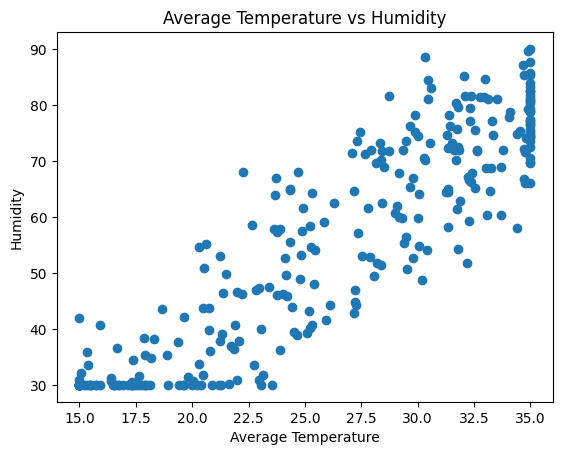

In [14]:
# Draw a graph between average temperature and humidity
plt.scatter(data_copy['avg_temperature'], data_copy['humidity'])
plt.xlabel('Average Temperature')
plt.ylabel('Humidity')
plt.title('Average Temperature vs Humidity')

There is high correlation between 'avg_temperature' and 'humidity'.

# Classification Models

In [15]:
# Split the data sets into training and testing sets
X = data_copy.drop('rain_or_not', axis=1)
y = data_copy['rain_or_not']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((236, 5), (60, 5), (236,), (60,))

In [16]:
X_train

,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure
70,22.722448,33.644798,9.100726,44.978465,1020.783510
20,34.778783,66.005954,5.023584,92.275719,956.895802
228,23.042613,39.985379,9.047282,55.508495,1041.807655
232,21.701672,36.863375,5.335091,35.538457,1041.077016
195,16.421028,31.225163,9.502173,65.616184,967.488144
...,...,...,...,...,...
200,17.760062,30.000000,7.885353,4.317374,1014.288191
79,15.000000,30.000000,1.869940,48.134415,996.229556
116,25.957604,41.602938,8.930775,46.147746,1002.332963
284,33.214250,64.672892,8.519178,8.860043,1010.192343


#### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy_score(y_test, y_pred)

0.7166666666666667

#### Decision Tree

In [18]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

0.5

#### Random Forest

In [19]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy_score(y_test, y_pred)

0.6833333333333333

#### XGBoost

In [20]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

accuracy_score(y_test, y_pred)

0.6666666666666666

#### Majority Voting

In [21]:
# Implement majority voting
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('rf', rf), ('xgb', xgb)], voting='hard')
voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.7166666666666667

# Box Plot Analysis

Text(0.5, 1.0, 'Box plot for Pressure')

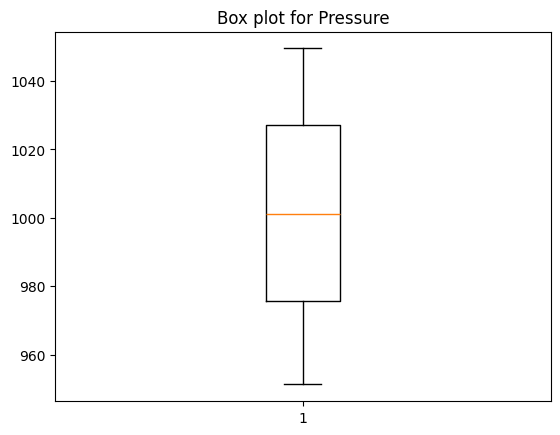

In [22]:
# Creating box plot for pressure
plt.boxplot(data_copy['pressure'])
plt.title('Box plot for Pressure')

Text(0.5, 1.0, 'Box plot for Cloud Cover')

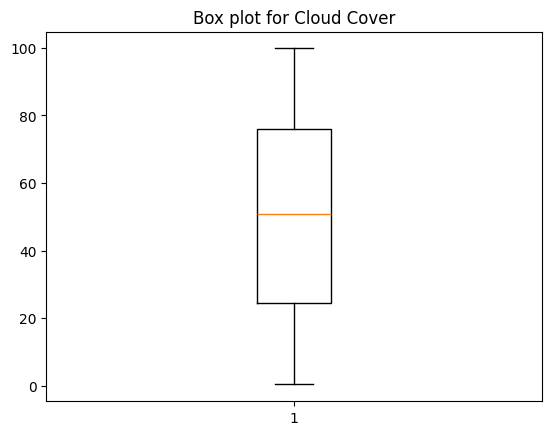

In [23]:


# Creating box plot for cloud cover sowing outliers
plt.boxplot(data_copy['cloud_cover'])
plt.title('Box plot for Cloud Cover')

Text(0.5, 1.0, 'Box plot for Wind Speed')

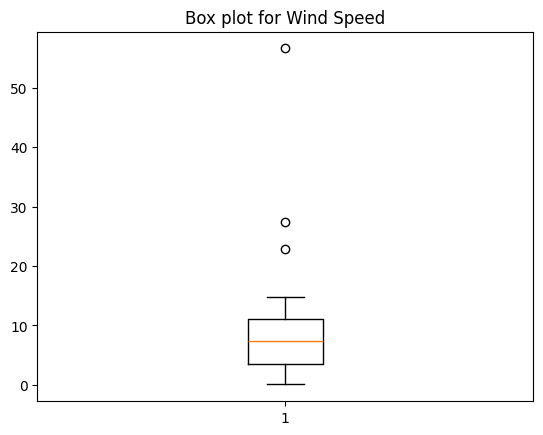

In [24]:

# Creating box plot for wind speed
plt.boxplot(data_copy['avg_wind_speed'])

plt.title('Box plot for Wind Speed')

Text(0.5, 1.0, 'Box plot for Humidity')

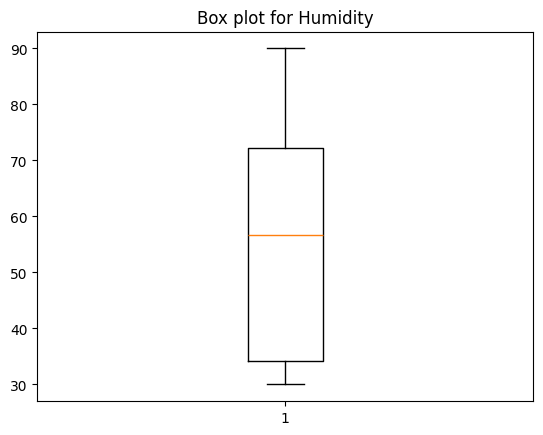

In [25]:


# Creating box plot for humidity
plt.boxplot(data_copy['humidity'])
plt.title('Box plot for Humidity')


Text(0.5, 1.0, 'Box plot for Average Temperature')

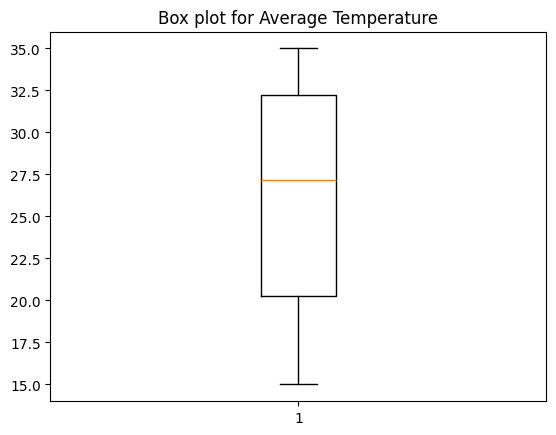

In [26]:
# Creating box plot for average temperature
plt.boxplot(data_copy['avg_temperature'])
plt.title('Box plot for Average Temperature')

# Normalizing the features

In [27]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)



In [28]:
X_train_scaled

array([[-0.49217204, -1.13287567,  0.27805742, -0.14181031,  0.6975542 ],
       [ 1.28716125,  0.56836823, -0.45664597,  1.47458336, -1.51975981],
       [-0.44492047, -0.79954777,  0.26842677,  0.2180557 ,  1.42722715],
       ...,
       [-0.01471178, -0.71451181,  0.24743224, -0.10184986,  0.05720167],
       [ 1.05625972,  0.49828842,  0.17326225, -1.37616502,  0.32997266],
       [-1.20425942, -1.04332354,  1.23588296,  0.67275606,  0.52036057]])

In [29]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

accuracy_score(y_test, y_pred)

0.7166666666666667

In [30]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

y_pred = dt.predict(X_test_scaled)

accuracy_score(y_test, y_pred)

0.4666666666666667

In [31]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

accuracy_score(y_test, y_pred)

0.6833333333333333

In [32]:
# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)

y_pred = xgb.predict(X_test_scaled)

accuracy_score(y_test, y_pred)

0.6666666666666666

In [33]:
# Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation="relu", max_iter=1000)
mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)

accuracy_score(y_test, y_pred)

0.65

# Hyperparameter Tuning

In [38]:
# Grid Search for Logistic Regression
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [100, 1000, 10000], 'solver': ['liblinear', 'newton-cholesky', 'sag', 'saga', 'lbfgs', 'newton-cg']}
grid_search = GridSearchCV(log_reg, param_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

grid_search.best_params_







{'C': 10, 'max_iter': 100, 'solver': 'liblinear'}

In [39]:
y_pred = grid_search.predict(X_test_scaled)

accuracy_score(y_test, y_pred)

0.7166666666666667

In [36]:
# Grid Search for MLP Classifier
parameter_grid = {'activation' : ['identity', 'logistic', 'tanh', 'relu'],
                   'solver' : ['lbfgs', 'sgd', 'adam'],
                   'alpha' : [0.0001,0.1,0.01]}

grid_search = GridSearchCV(mlp, parameter_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

grid_search.best_params_
                  

C:\Users\gayka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gayka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gayka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gayk

{'activation': 'identity', 'alpha': 0.1, 'solver': 'lbfgs'}

In [37]:
y_pred = grid_search.predict(X_test_scaled)

accuracy_score(y_test, y_pred)

0.7166666666666667

# Time Series Forecasting

In [40]:
data

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,1,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,1,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,1,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,1,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,1,38.062329,1030.264331
...,...,...,...,...,...,...,...
306,2023-11-03,22.072834,37.756910,4.729355,0,27.307081,954.564875
307,2023-11-04,19.645885,42.190604,8.092369,0,51.807877,964.002410
308,2023-11-05,23.884496,36.205508,11.860847,1,29.872557,977.681431
309,2023-11-06,18.168418,34.785000,4.781288,0,94.067925,1047.153269


In [41]:
data.dropna(inplace=True)

In [42]:
data.shape

(296, 7)

In [43]:
data.drop('rain_or_not', axis=1, inplace=True)

In [45]:
data

,date,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,38.062329,1030.264331
...,...,...,...,...,...,...
306,2023-11-03,22.072834,37.756910,4.729355,27.307081,954.564875
307,2023-11-04,19.645885,42.190604,8.092369,51.807877,964.002410
308,2023-11-05,23.884496,36.205508,11.860847,29.872557,977.681431
309,2023-11-06,18.168418,34.785000,4.781288,94.067925,1047.153269


In [46]:
# Separate the first 270 rows for training
X_train = data.iloc[:270, :]
X_test = data.iloc[270:, :]
X_train.shape, X_test.shape

((270, 6), (26, 6))

### Average Temperature

In [47]:
temp_train = X_train['avg_temperature']
temp_test = X_test['avg_temperature']

temp_train

0      23.745401
1      30.030503
2      28.365224
3      27.550929
4      23.639303
         ...    
278    35.000000
280    35.000000
281    31.766657
282    31.845999
283    28.711279
Name: avg_temperature, Length: 270, dtype: float64

In [50]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(temp_train, order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())



                               SARIMAX Results                                
Dep. Variable:        avg_temperature   No. Observations:                  270
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -672.687
Date:                Sat, 08 Mar 2025   AIC                           1357.373
Time:                        18:28:58   BIC                           1378.942
Sample:                             0   HQIC                          1366.035
                                - 270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6876      0.056    -12.289      0.000      -0.797      -0.578
ar.L2         -0.4625      0.064     -7.207      0.000      -0.588      -0.337
ar.L3         -0.3190      0.068     -4.697      0.0

C:\Users\gayka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
forecast = model_fit.forecast(steps=30)[0]

forecast